In [ ]:
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


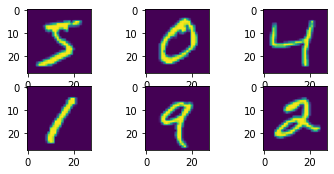

In [ ]:
#visualizing the images
for i in range(6):
  plt.subplot(330+1+i)
  plt.imshow(trainX[i])

In [ ]:
#data normalization
#make every pixel value to be between 0-1 to make the training process faster
X_train=trainX.astype('float')/255
y_train=trainy.astype('float')/255

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  # This is added back by InteractiveShellApp.init_path()


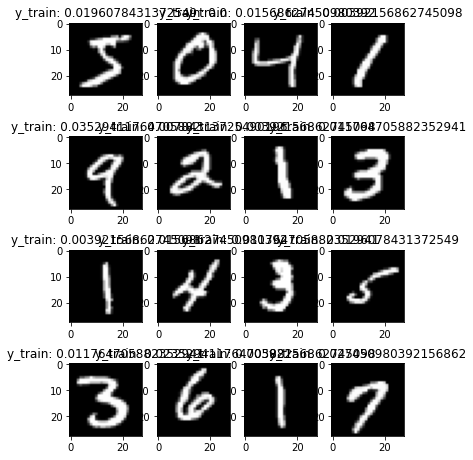

In [ ]:

num=16
horizontal = 4
vertical = 4
# plot images
fig, axes = plt.subplots(horizontal, vertical, figsize=(1.5*vertical,2*horizontal))
for i in range(num):
    ax = axes[i//horizontal, i%vertical]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('y_train: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

In [ ]:
print(trainX.shape)

(60000, 28, 28)


In [ ]:
#checking one of the images matrix values
print(trainX[59999])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48
   48  22   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254
  254 212  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 25

In [ ]:
#Flattening and model building
model =tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(64, activation='relu'),
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(trainX, trainy, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 4.7214 - accuracy: 0.8033
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3142 - accuracy: 0.9226
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1908 - accuracy: 0.9456
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1598 - accuracy: 0.9550
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1360 - accuracy: 0.9609
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1176 - accuracy: 0.9666
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1093 - accuracy: 0.9686
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1032 - accuracy: 0.9721
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0861 - accuracy: 0.9759
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.082

In [ ]:
#model evaluation
print(model.evaluate(testX, testy))

313/313 [==============================] - 1s 1ms/step - loss: 0.1454 - accuracy: 0.9649
[0.1453818827867508, 0.964900016784668]


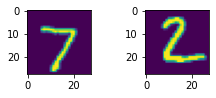

In [ ]:
#visualizing the images
for i in range(2):
  plt.subplot(330+1+i)
  plt.imshow(testX[i])

2


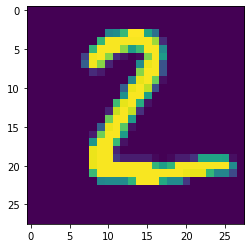

In [ ]:
plt.imshow(testX[1])
prediction=model.predict(testX)
print(np.argmax(prediction[1]))

7


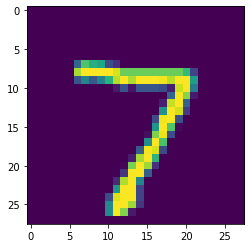

In [ ]:
plt.imshow(testX[0])
prediction=model.predict(testX)
print(np.argmax(prediction[0]))